<img src=images/home2.jpg width = "1500" height = "4000">

### Importing Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
!ls Data

column_names.md   kc_house_data.csv


In [3]:
# Reading our csv file as dataframe
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,NONE,...,8 Good,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731
21588,9834201367,1/26/2015,429000.0,3,2.00,1490,1126,3.0,NO,NONE,...,8 Good,1490,0.0,2014,0.0,98144,47.5699,-122.288,1400,1230
21589,3448900210,10/14/2014,610685.0,4,2.50,2520,6023,2.0,NO,NaN,...,9 Better,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023
21590,7936000429,3/26/2015,1010000.0,4,3.50,3510,7200,2.0,NO,NONE,...,9 Better,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# We have a total of 6281 missing data in (waterfront 2376, view 63, and yr_renovated 3842) columns.
df.isna().sum().sum()

6281

## Data Preparation

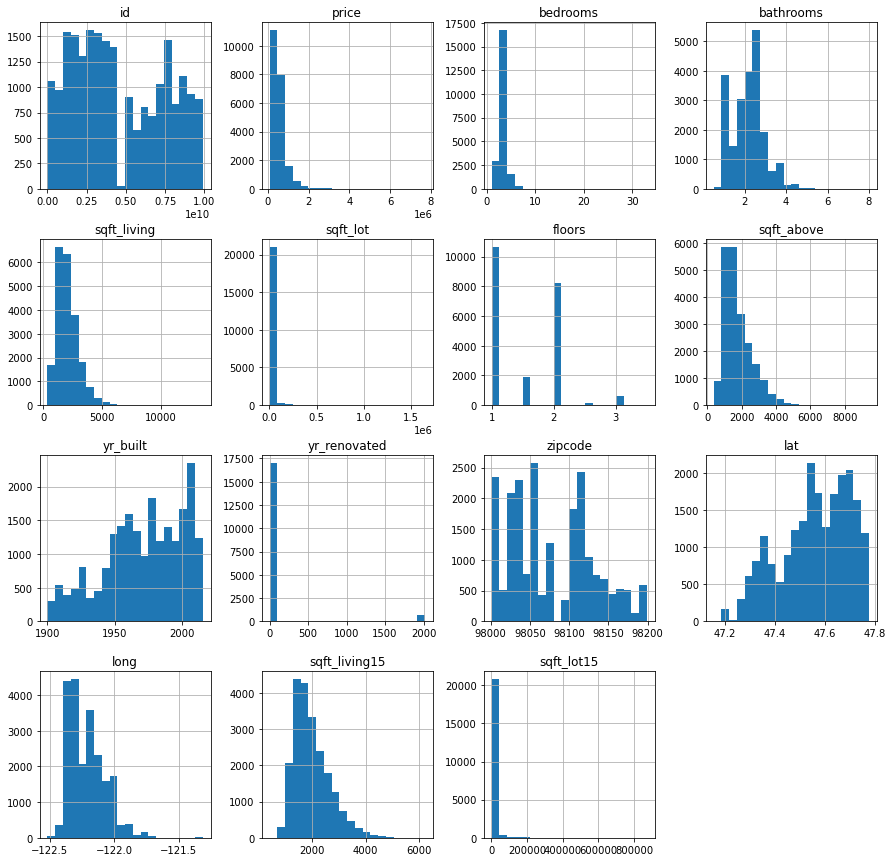

In [8]:
#### Checking the distribution of our data.
df.hist(figsize = [15, 15],bins = 20)
plt.show()

In [9]:
# Checking for correlation in our data using heatmap.
df_corr = df.corr()
df_corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


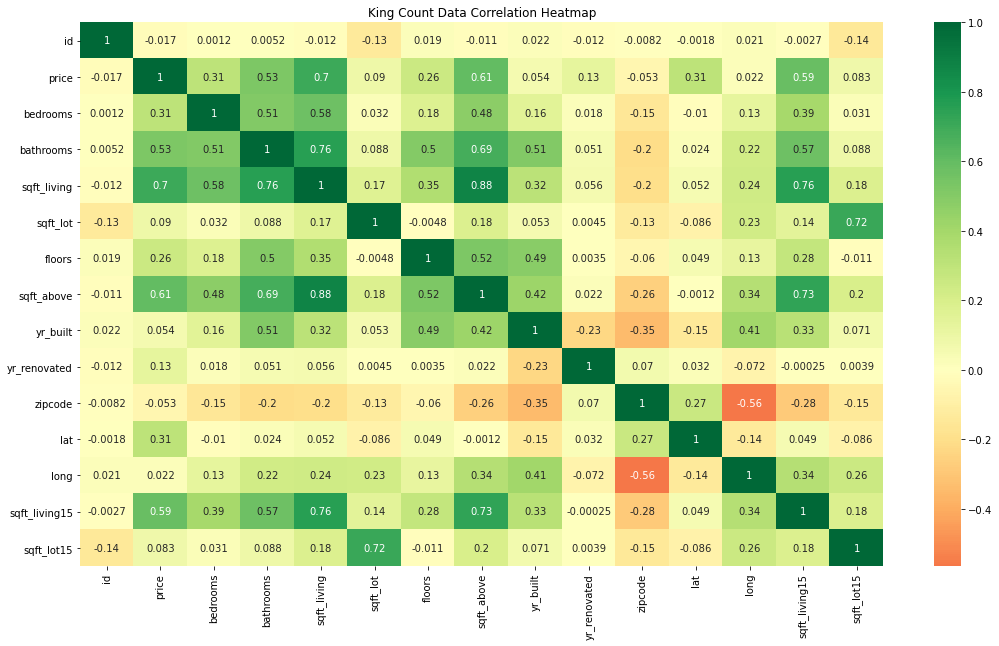

In [10]:
plt.figure(figsize = (18, 10))
sns.heatmap(df_corr, center = 0, annot = True, cmap = 'RdYlGn')
plt.title('King Count Data Correlation Heatmap')
plt.show()

As showing above, we have some few collinearity in our data. And based on what's showing above we have more than 3 variables that have a strong linear relationship, meaning we have a special case of multicollinearity. Multicollinearity is a special case of collinearity where a strong linear relationship exists between 3 or more independent variables even if no pair of variables has a high correlation.

In [11]:
# Checking what columns have a strong relationship with price.
# And it seems like sqft_living, sqft_above, and sqft_living15 are the most correlated varibales in our data.
price_corr = df.corr()['price'].sort_values(ascending = False)
price_corr

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

## Dealing with missing data.

In [12]:
# Checking numerical columns. 
df_numeric = df.select_dtypes(include=['int64', 'float64'])

df_non_numeric = df.select_dtypes(exclude=['int64', 'float64'])

print(df_numeric.columns)
print(df_non_numeric.columns)

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
Index(['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement'], dtype='object')


In [13]:
# Converting grade values to numeric for easy data manipulation.
df['grade'] = df['grade'].str.slice(0,2).str.strip()
df['grade'] = df['grade'].astype(np.int64)

In [14]:
# Dealing missing values in views by converting them to numeric values.
df['view'].fillna('NONE', inplace=True)
df['view'].replace('NONE', '0', inplace=True)
df['view'].replace('FAIR', '1', inplace=True)
df['view'].replace('AVERAGE', '2', inplace=True)
df['view'].replace('GOOD', '3', inplace=True)
df['view'].replace('EXCELLENT', '4', inplace=True)
df['view'] = df['view'].astype(np.int64)

In [15]:
# Converting yr_renovated values to numeric int for easy data manipulation.
# 0 means the house is not renovated and 1 means the house is renovated.
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['is_rennovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df['is_rennovated'].value_counts()
df = df.drop(['yr_renovated'], axis=1)
df.is_rennovated.value_counts()

0    20853
1      744
Name: is_rennovated, dtype: int64

## Training and Modeling 

In [16]:
# Training our data.
y_df = df["price"]
x_df = df.drop("price", axis=1)
x_train, X_test, y_train, y_test = train_test_split(x_df, y_df, random_state=42)

In [17]:
x_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,is_rennovated
6405,3905080280,3/4/2015,3,2.50,1880,4499,2.0,NO,0,Average,8,1880,0.0,1993,98029,47.5664,-121.999,2130,5114,0
937,5466420030,10/7/2014,3,2.50,2020,6564,1.0,NO,0,Average,7,1310,710.0,1994,98042,47.3545,-122.158,1710,5151,0
19076,2623069010,1/16/2015,5,4.00,4720,493534,2.0,NO,0,Very Good,9,3960,760.0,1975,98027,47.4536,-122.009,2160,219542,0
15201,4443800545,3/30/2015,2,2.00,1430,3880,1.0,NO,0,Good,7,1430,0.0,1949,98117,47.6844,-122.392,1430,3880,0
13083,9485930120,10/14/2014,3,2.25,2270,32112,1.0,NO,0,Good,8,1740,530.0,1980,98042,47.3451,-122.094,2310,41606,0


Setting up the baseline that we will use to compare linear regression models that we will be building in our model.

In [20]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train, y_train)
dummy_regr.predict(x_train)
dummy_regr.score(x_train, y_train)

0.0